# Heroes of Pymoli

Heroes of Pymoli is a free-to-play game, but players are encouraged to purchase optional items that enhance their playing experience.
The purpose of this project is to generate a report that breaks down the game's purchasing data into meaningful insights.

In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table

In [2]:
# File to Load
file_path = "purchase_data.csv"

# Read Purchasing File and store into Pandas data frame
purchase_data = pd.read_csv(file_path)
purchase_data.head()

,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price
0,0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53
1,1,Lisovynya38,40,Male,143,Frenzied Scimitar,1.56
2,2,Ithergue48,24,Male,92,Final Critic,4.88
3,3,Chamassasya86,24,Male,100,Blindscythe,3.27
4,4,Iskosia90,23,Male,131,Fury,1.44


In [3]:
purchase_data.describe()

,Purchase ID,Age,Item ID,Price
count,780.000000,780.000000,780.000000,780.000000
mean,389.500000,22.714103,92.114103,3.050987
std,225.310896,6.659444,52.775943,1.169549
min,0.000000,7.000000,0.000000,1.000000
25%,194.750000,20.000000,48.000000,1.980000
50%,389.500000,22.000000,93.000000,3.150000
75%,584.250000,25.000000,139.000000,4.080000
max,779.000000,45.000000,183.000000,4.990000


## Player Count

* Display the total number of players


In [4]:
# calculate total players
players_data = purchase_data.loc[:,["SN","Age","Gender"]]
# drop duplicates so players are not counted more than once
player_info = players_data.drop_duplicates()

player_count=len(player_info["SN"])
total_players_df = pd.DataFrame({"Total Players":[len(player_info["SN"])]})
total_players_df

,Total Players
0,576


## Purchasing Analysis (Total)

* Find the number of items being sold, avg price, total number of purchases, and the total revenue from the game


In [5]:
# calculate unique items purchase
items_count = len(purchase_data["Item ID"].unique())
# calculate average price of unique items
average_price = purchase_data["Price"].mean()
# calculate number of purchases
total_purchases = purchase_data["Item Name"].count()
# calculate total revenue
total_revenue = purchase_data["Price"].sum()

# create a dataframe to display calculations
purchases_analysis = pd.DataFrame({"Number of Unique Items": [items_count],
                                  "Average Price": [f"${average_price:.2f}"],
                                  "Number of Purchases": [total_purchases],
                                  "Total Revenue": [f"${total_revenue:,.2f}"]
                                  })
purchases_analysis

,Number of Unique Items,Average Price,Number of Purchases,Total Revenue
0,183,$3.05,780,"$2,379.77"


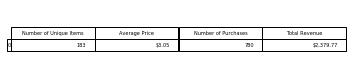

In [6]:
# save df as image to use in README
ax = plt.subplot(911, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
table(ax, purchases_analysis)
plt.savefig('images/purchases_analysis.png')

## Gender Demographics

* Find the percentage and Count of Male, Female, and Other / Non-Disclosed Players

In [7]:
# count totals of each gender
gender_totals = player_info["Gender"].value_counts()

# calculate percentage of each gender in total players
gender_perc = (gender_totals/player_count)*100

# create df showing both gender totals and percentages
genders_df = pd.DataFrame({"Total Count":gender_totals,
                          "Percentage of Players":gender_perc.map("{:.2f}%".format)})
genders_df

,Total Count,Percentage of Players
Male,484,84.03%
Female,81,14.06%
Other / Non-Disclosed,11,1.91%



## Purchasing Analysis (Gender)

* Obtain purchase count, avg. purchase price, avg. purchase total per person etc. by gender

In [8]:
# group original dataframe by gender, need information for all purchases
gender_anal=purchase_data.groupby("Gender")

# find purchase count for each gender
gender_purchase_count = gender_anal["SN"].count()
# find average purchase price
gender_avg_price = gender_anal["Price"].mean()
# find total purchase value
gender_total_price = gender_anal["Price"].sum()
# find average total purchase per person
gender_avg_total = gender_anal["Price"].sum()/gender_totals

# create a dataframe to display information found
gender_analysis_df = pd.DataFrame({"Purchase Count": gender_purchase_count,
                                  "Average Purchase Price": gender_avg_price.map("${:.2f}".format),
                                  "Total Purchase Value": gender_total_price.map("${:.2f}".format),
                                  "Avg Total Purchase per Person": gender_avg_total.map("${:.2f}".format)})
gender_analysis_df

,Purchase Count,Average Purchase Price,Total Purchase Value,Avg Total Purchase per Person
Gender,,,,
Female,113,$3.20,$361.94,$4.47
Male,652,$3.02,$1967.64,$4.07
Other / Non-Disclosed,15,$3.35,$50.19,$4.56


## Age Demographics

* Organize players based on age groups and calculate the total players per age group

In [9]:
# create dataframe without duplicates
player_age_data = purchase_data.loc[:,["SN","Age","Price"]]
age_players = player_age_data.drop_duplicates(["SN","Age"])

In [10]:
# create groups and labels for age
age_bins = [0,9,14,19,24,29,34,39,100]
age_groups = ["<10","10-14","15-19","20-24","25-29","30-34","35-39","40+"]

# categorize players using age bins
age_players["Age Groups"] = pd.cut(age_players["Age"], age_bins, labels=age_groups)
group_ages = age_players.groupby(["Age Groups"])

# calculate total in each age group
age_count = group_ages["Age Groups"].count()
# calculate percentage of each age group in total players
age_perc = (age_count / player_count)*100

# create a dataframe to display age group information
age_demographics = pd.DataFrame({"Total Count": age_count,
                                "Percentage of Players": age_perc
                                })
# formatting
age_demographics["Percentage of Players"] = age_demographics["Percentage of Players"].map("{:.2f}%".format)
age_demographics

C:\Users\elisa\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Total Count,Percentage of Players
Age Groups,,
<10,17,2.95%
10-14,22,3.82%
15-19,107,18.58%
20-24,258,44.79%
25-29,77,13.37%
30-34,52,9.03%
35-39,31,5.38%
40+,12,2.08%


## Purchasing Analysis (Age)

* Obtain purchase count, avg. purchase price, avg. purchase total per person etc. based on age groups

In [11]:
# bin dataframe with duplicate information using bins
player_age_data["Age Groups"] = pd.cut(player_age_data["Age"], age_bins, labels=age_groups)
all_ages_info = player_age_data.groupby(["Age Groups"])

In [12]:
# find purchase count for age group
age_purchase_count = all_ages_info["SN"].count()
# find average purchase price
age_avg_price = all_ages_info["Price"].mean()
# find total purchase value
age_total_price = all_ages_info["Price"].sum()
# find average total purchase per person
age_avg_total = all_ages_info["Price"].sum()/age_count

# create a dataframe to display information found
age_analysis_df = pd.DataFrame({"Purchase Count": age_purchase_count,
                                  "Average Purchase Price": age_avg_price,
                                  "Total Purchase Value": age_total_price,
                                  "Avg Total Purchase per Person": age_avg_total})

# formatting
age_analysis_df["Average Purchase Price"]=age_analysis_df["Average Purchase Price"].map("${:.2f}".format)

age_analysis_df["Total Purchase Value"]=age_analysis_df["Total Purchase Value"].map("${:.2f}".format)

age_analysis_df["Avg Total Purchase per Person"]=age_analysis_df["Avg Total Purchase per Person"].map("${:.2f}".format)
age_analysis_df

,Purchase Count,Average Purchase Price,Total Purchase Value,Avg Total Purchase per Person
Age Groups,,,,
<10,23,$3.35,$77.13,$4.54
10-14,28,$2.96,$82.78,$3.76
15-19,136,$3.04,$412.89,$3.86
20-24,365,$3.05,$1114.06,$4.32
25-29,101,$2.90,$293.00,$3.81
30-34,73,$2.93,$214.00,$4.12
35-39,41,$3.60,$147.67,$4.76
40+,13,$2.94,$38.24,$3.19


## Top Spenders

* Calculate the avg purchase count, avg purchase price, and total purchase value of all players
* Focus on the top spenders

In [13]:
# group original dataframe by gender, need information for all purchases
top_spenders=purchase_data.groupby("SN")

# find purchase count for each screenname
sn_purchases = top_spenders["SN"].count()
# find average purchase price
sn_avg_price = top_spenders["Price"].mean()
# find total purchase value
sn_total_price = top_spenders["Price"].sum()

# create a dataframe to display information found
sn_purchases_df = pd.DataFrame({"Purchase Count": sn_purchases,
                                  "Average Purchase Price": sn_avg_price,
                                  "Total Purchase Value": sn_total_price
                                  })

# sort by highest purchase price
top_spenders_df=sn_purchases_df.sort_values("Total Purchase Value", ascending=False)

top_spenders_df["Average Purchase Price"] = top_spenders_df["Average Purchase Price"].map("${:,.2f}".format)
top_spenders_df["Total Purchase Value"] = top_spenders_df["Total Purchase Value"].map("${:,.2f}".format)
top_spenders_df.head()

,Purchase Count,Average Purchase Price,Total Purchase Value
SN,,,
Lisosia93,5,$3.79,$18.96
Idastidru52,4,$3.86,$15.45
Chamjask73,3,$4.61,$13.83
Iral74,4,$3.40,$13.62
Iskadarya95,3,$4.37,$13.10


## Most Popular Items

* Find the most popular items based on total purchase count

In [14]:
# group by item ID
popular_df=purchase_data[["Item ID","Item Name", "Price"]]
popular_df=popular_df.groupby(["Item ID", "Item Name"])

# count how many times an item was purchased
item_counts = popular_df["Item ID"].count()
# find price of item
item_price = popular_df["Price"].mean()
# find total purchase value of item
total_item_price = popular_df["Price"].sum()

# create a dataframe to display information found
popular_items_df = pd.DataFrame({"Purchase Count": item_counts,
                                  "Item Price": item_price,
                                  "Total Purchase Value": total_item_price,
                                  })
popular_items=popular_items_df.sort_values("Purchase Count", ascending=False)
# formatting
popular_items["Item Price"] = popular_items["Item Price"].map("${:,.2f}".format)
popular_items["Total Purchase Value"] = popular_items["Total Purchase Value"].map("${:,.2f}".format)

popular_items.head()

,,Purchase Count,Item Price,Total Purchase Value
Item ID,Item Name,,,
178,"Oathbreaker, Last Hope of the Breaking Storm",12,$4.23,$50.76
145,Fiery Glass Crusader,9,$4.58,$41.22
108,"Extraction, Quickblade Of Trembling Hands",9,$3.53,$31.77
82,Nirvana,9,$4.90,$44.10
19,"Pursuit, Cudgel of Necromancy",8,$1.02,$8.16


## Most Profitable Items

* Focus on the most profitable items by organizing by the total purchase value (purchase count * item price)

In [15]:
# sort by highest purchase value
most_profitable=popular_items_df.sort_values("Total Purchase Value", ascending=False)
# formatting
most_profitable["Item Price"] = most_profitable["Item Price"].map("${:,.2f}".format)
most_profitable["Total Purchase Value"] = most_profitable["Total Purchase Value"].map("${:,.2f}".format)

most_profitable.head()

,,Purchase Count,Item Price,Total Purchase Value
Item ID,Item Name,,,
178,"Oathbreaker, Last Hope of the Breaking Storm",12,$4.23,$50.76
82,Nirvana,9,$4.90,$44.10
145,Fiery Glass Crusader,9,$4.58,$41.22
92,Final Critic,8,$4.88,$39.04
103,Singed Scalpel,8,$4.35,$34.80


## Three Obervable Trends

One very clear trend is that there are significantly more male players than female. However, the female players tend to spend more on their purchases than their male counterparts.

In addition, the largest group of players by age is the 20-24 age group, making up nearly half the players in the program. However, they only have the third highest average purchase price and third highest average total purchase value. The highest profit area seems to come from the 15-34 age group range.

Also, between 3-5 dollars seems to be an approachable price range for players to purchase items. However, out of 576 players, the item purchased most often was only purchased 12 times. Below that, the next most popular items are purchase less than 10 times, so there is a large spread of popular items. Keeping the price under $5 would likely be the most profitable way to price items.